In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000860413"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000860413
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,FIRST INTERSTATE BANCSYSTEM INC
Ticker,FIBK


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,44.0,2.456205e+01,1.183598e+01,15.96,1.733500e+01,20.51,2.538250e+01,6.691000e+01
interest income,35.0,6.605120e+07,1.377636e+07,46567000.00,5.117650e+07,69057000.00,7.744800e+07,8.992800e+07
net income,60.0,1.857322e+07,8.836912e+06,6659000.00,1.189825e+07,16592000.00,2.236050e+07,4.170000e+07
net interest income,60.0,6.133995e+07,2.055979e+07,32790000.00,4.587675e+07,60989000.00,6.571950e+07,1.189000e+08
provision for loan losses,60.0,4.432167e+06,5.565205e+06,-5000000.00,1.397500e+06,2420000.00,5.399750e+06,1.950000e+07


# Plots

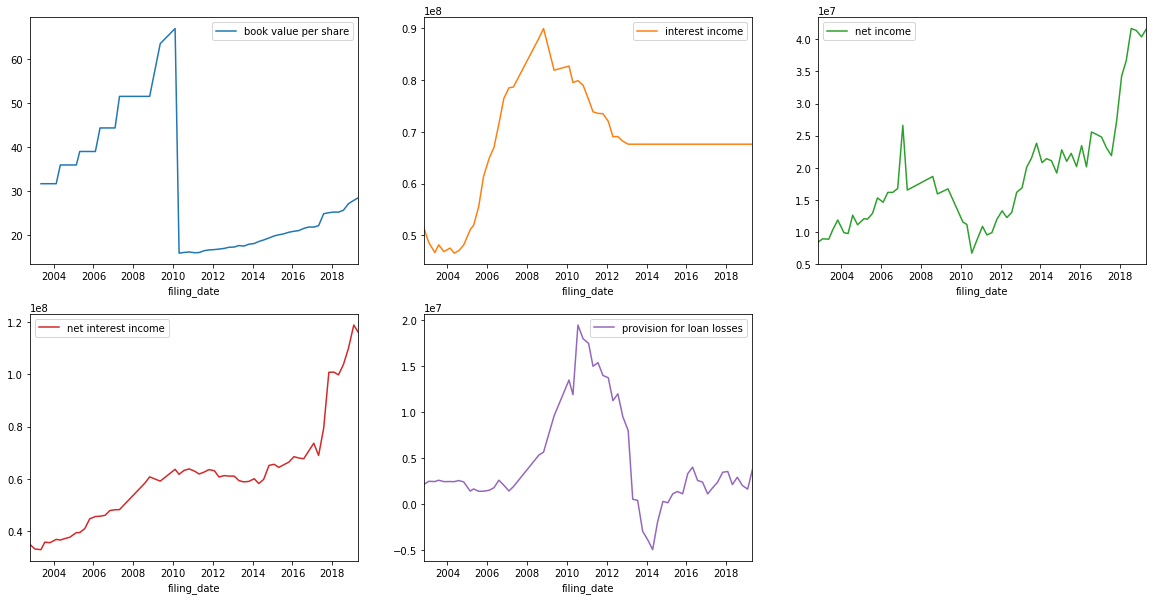

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000860413 book value per share        2002Q3 to 2002Q4: 2 periods  missing   
           book value per share        2003Q2 to 2003Q4: 3 periods  missing   
           book value per share        2004Q2 to 2004Q4: 3 periods  missing   
           book value per share        2005Q2 to 2005Q4: 3 periods  missing   
           book value per share        2006Q2 to 2006Q4: 3 periods  missing   
           book value per share        2007Q2 to 2008Q4: 7 periods  missing   
           book value per share        2009Q2 to 2009Q3: 2 periods  missing   
           interest income             2007Q2 to 2008Q1: 4 periods  missing   
           interest income                                  2008Q4  missing   
           interest income             2009Q2 to 2009Q3: 2 periods  missing   
           interest income            2013Q1 to 2019Q1: 25 periods  missing   
           net income                  2007Q2 to 2008Q1: 4 periods  missing   
           net income                                       2008Q4  missing   
           net income                  2009Q2 to 2009Q3: 2 periods  missing   
           net interest income         2007Q2 to 2008Q1: 4 periods  missing   
           net interest income                              2008Q4  missing   
           net interest income         2009Q2 to 2009Q3: 2 periods  missing   
           provision for loan losses   2007Q2 to 2008Q1: 4 periods  missing   
           provision for loan losses                        2008Q4  missing   
           provision for loan losses   2009Q2 to 2009Q3: 2 periods  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0000860413 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()